#Task 2: Customer Segmentation Using Unsupervised Learning

**Dataset:**
Mall Customers Dataset

##1. Introduction and Problem Statement
**Introduction**

Customer segmentation is a business technique used to divide customers into groups based on similar characteristics. Instead of treating all customers the same, companies analyze customer behavior and create targeted marketing strategies for each group. This helps improve sales, reduce marketing costs, and strengthen customer relationships.

**Problem Statement**

Mall management wants to understand customer behavior to create better marketing strategies. Currently, customers are not segmented based on purchasing patterns, making it difficult to personalize offers. The goal is to identify natural customer groups using features such as age, gender, income, and spending score to improve marketing effectiveness and profitability.


**Objective**

Cluster customers based on spending habits and propose marketing strategies tailored to each
segment.

##2. Dataset Understanding and Description
We are using the **Mall Customers Dataset**.

This dataset contains customer information collected by a shopping mall.

**Dataset Features**
- CustomerID
- Gender
- Age
- Annual Income (k$)
- Spending Score (1–100)

**Important Feature**
- Spending Score (1–100)
- This score shows how much a customer spends.
- Higher score → spends more money.

##3. Data Loading and Cleaning
**Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

**Load the Dataset**

In [2]:
from google.colab import files
files.upload()

df = pd.read_csv("Mall_Customers.csv")

Saving Mall_Customers.csv to Mall_Customers.csv



**Dataset Shape**


In [3]:
# Check dimensions
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (200, 5)


**Dataset Information**



In [4]:
# Summary of data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Column Names**


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

**Preview the Dataset**


In [6]:
# Preview first 5 rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Dataset Description**

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##4. Data Cleaning and Preprocessing


**Check for Missing Values**



In [8]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


No missing values found.

**Encode Categorical Features**

In [9]:
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})

**Drop unnecessary Columns**

CustomerID has no impact on clustering.

In [10]:
df = df.drop('CustomerID', axis=1)

**feature Scaling**

In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

##5. Exploratory Data Analysis (EDA)

**Age Distribution**

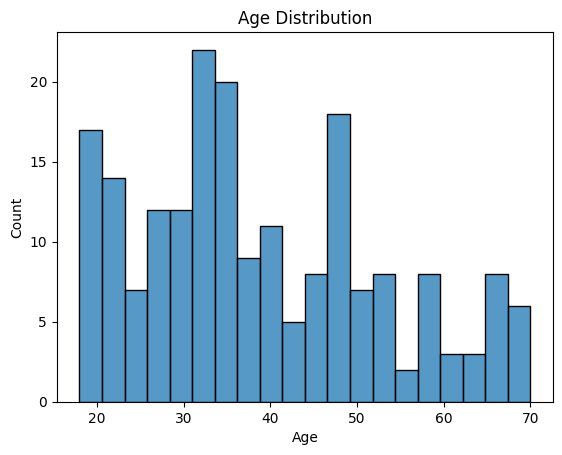

In [12]:
sns.histplot(df['Age'], bins=20)
plt.title("Age Distribution")
plt.show()

**Insight:**

Most customers are between 20–40 years old.

**Income vs Spending Score**

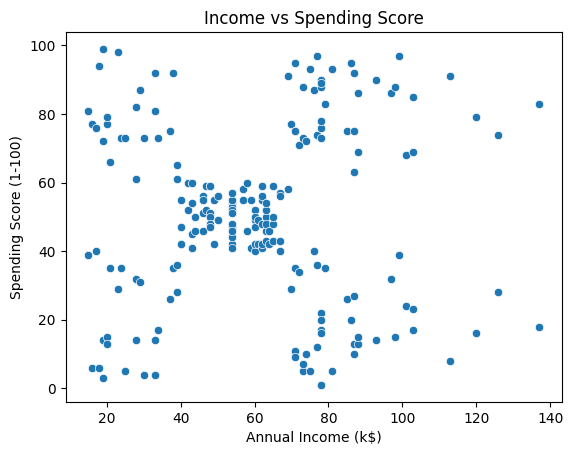

In [13]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title("Income vs Spending Score")
plt.show()

**Insight:**

- Customers naturally form groups:
- High income, high spending
- High income, low spending
- Low income, high spending
- Low income, low spending

**Gender vs Spending**

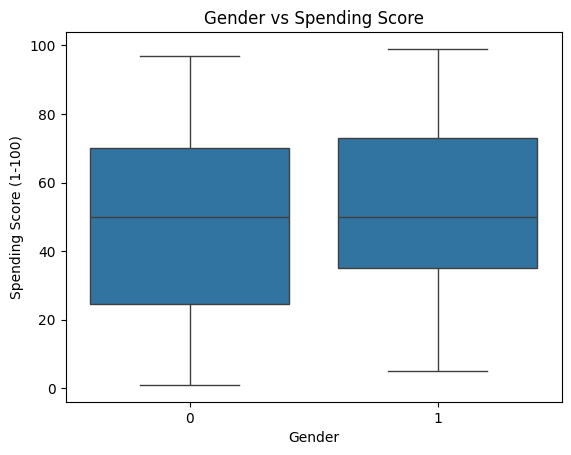

In [14]:
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title("Gender vs Spending Score")
plt.show()

**Insight:**

Spending behavior slightly differs between genders.

##6. K-Means Clustering

K-Means is an unsupervised learning algorithm that groups similar data points together.

**Find Optimal Number of Clusters**

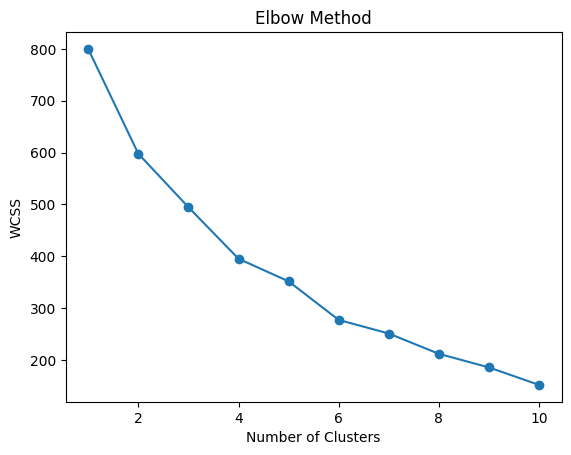

In [15]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


**Explanation:**

The graph shows a clear bend at 5 clusters, meaning adding more clusters after 5 does not significantly improve grouping. Therefore, the optimal number of clusters is K = 5.

###**Apply K-Means**

After selecting K = 5, the algorithm groups customers into five segments based on similarity in age, income, and spending score.

In [16]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

df['Cluster'] = clusters
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,4
3,1,23,16,77,4
4,1,31,17,40,4


Each customer now belongs to one of five clusters labeled 0 to 4.

##7. Dimensionality Reduction Visualization

High-dimensional data is hard to visualize.We use PCA and t-SNE to reduce dimensions to 2D.


###**PCA Visualization**

The dataset has multiple dimensions, so we reduce it to two dimensions using Principal Component Analysis (PCA). PCA keeps the most important information while making visualization possible.

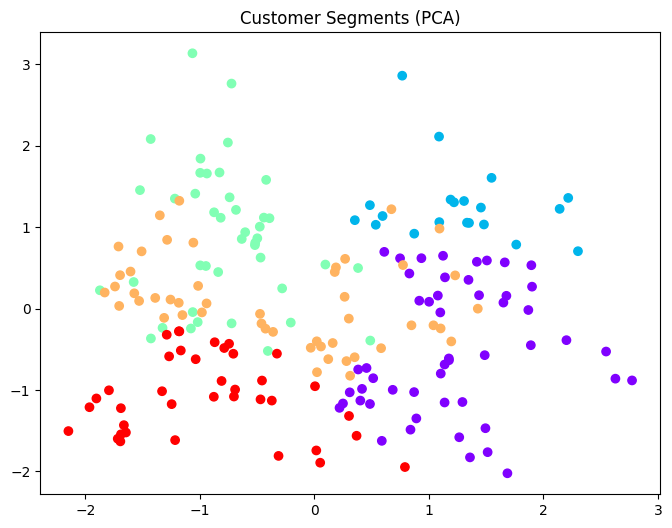

In [17]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=clusters, cmap='rainbow')
plt.title("Customer Segments (PCA)")
plt.show()


**Explanation:**

The PCA plot shows clear separation between customer groups, confirming that clustering is meaningful.

###**t-SNE Visualization**


t-SNE is another dimensionality reduction technique that preserves local relationships between data points and shows clusters more clearly.

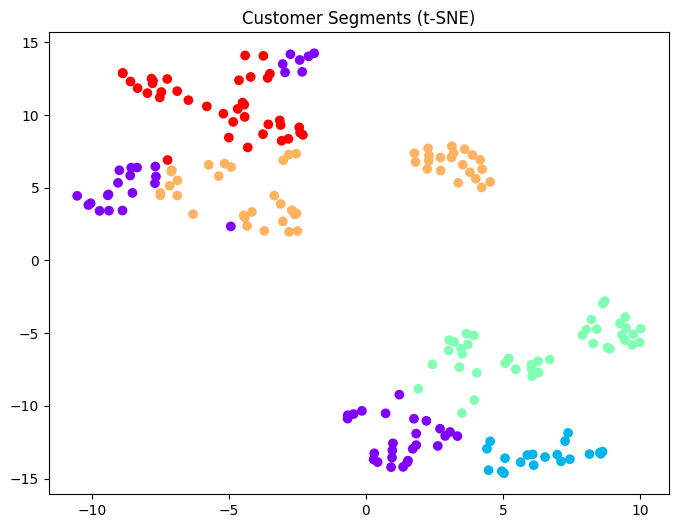

In [18]:
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(tsne_data[:,0], tsne_data[:,1], c=clusters, cmap='rainbow')
plt.title("Customer Segments (t-SNE)")
plt.show()


**Explanation:**

t-SNE provides a more detailed view of cluster separation and confirms the existence of five distinct customer groups.

##8. Cluster Analysis
To understand each group, we calculate the average values of features in each cluster.

In [19]:
df.groupby('Cluster').mean()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.490196,56.470588,46.098039,39.313725
1,0.000000,39.500000,85.150000,14.050000
2,0.000000,28.690476,60.904762,70.238095
3,1.000000,37.897959,82.122449,54.448980
4,1.000000,27.315789,38.842105,56.210526


**Interpretation Example:**

| Cluster | Description                 |
| ------- | --------------------------- |
| 0       | Low income – low spending   |
| 1       | High income – high spending |
| 2       | High income – low spending  |
| 3       | Low income – high spending  |
| 4       | Average customers           |


##9. Marketing Strategy Based on Clusters


| Cluster | Customer Type               | Strategy                         |
| ------- | --------------------------- | -------------------------------- |
| 0       | Low income – low spending   | Discounts & coupons              |
| 1       | High income – high spending | VIP membership, premium services |
| 2       | High income – low spending  | Persuasion ads, loyalty rewards  |
| 3       | Low income – high spending  | Bundle offers & limited deals    |
| 4       | Average customers           | Regular promotions               |


##10. Conclusion

- Customers were successfully segmented into 5 clusters
- Spending behavior does not always depend on income
- Different strategies are required for different segments

Using customer segmentation:

- Improves marketing efficiency
- Increases sales
- Reduces marketing waste
- Builds better customer relationships